# DAAN 862 Lesson 11 Assignment 1

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# For Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# For DBSCAN clustering
from sklearn.cluster import DBSCAN


In [32]:
# Load Breast Cancer dataset
data = pd.read_csv('seeds_dataset.csv')

## Question 1:  Explore the Seeds Data Set

In [34]:
# Assign appropriate column names
column_names = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'GrooveLength', 'Class']
data.columns = column_names

In [38]:
# Overview of the data
print("Dataset Shape:", data.shape)
print("First few rows of the dataset:\n", data.head())
print("\nData types and missing values:\n", data.info())

Dataset Shape: (209, 8)
First few rows of the dataset:
     Area  Perimeter  Compactness  Length  Width  Asymmetry  GrooveLength  \
0  14.88      14.57       0.8811   5.554  3.333      1.018         4.956   
1  14.29      14.09       0.9050   5.291  3.337      2.699         4.825   
2  13.84      13.94       0.8955   5.324  3.379      2.259         4.805   
3  16.14      14.99       0.9034   5.658  3.562      1.355         5.175   
4  14.38      14.21       0.8951   5.386  3.312      2.462         4.956   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          209 non-null    float64
 1   Perimeter     209 non-null    float64
 2   Compactness   209 non-null    float64
 3   Length        209 non-null    float64
 4   Width         209 non-null    float64
 5   Asymmetry  

In [40]:
# Statistical Summary of the dataset
print("\nStatistical Summary:\n", data.describe())


Statistical Summary:
              Area   Perimeter  Compactness      Length       Width  \
count  209.000000  209.000000   209.000000  209.000000  209.000000   
mean    14.845550   14.557943     0.870999    5.627890    3.258349   
std      2.916545    1.308949     0.023686    0.444029    0.378603   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.260000   13.450000     0.856700    5.262000    2.941000   
50%     14.340000   14.290000     0.873500    5.520000    3.232000   
75%     17.320000   15.730000     0.887900    5.980000    3.562000   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

        Asymmetry  GrooveLength       Class  
count  209.000000    209.000000  209.000000  
mean     3.707278      5.408971    2.004785  
std      1.503657      0.492487    0.817463  
min      0.765100      4.519000    1.000000  
25%      2.587000      5.045000    1.000000  
50%      3.600000      5.224000    2.000000  
75%      4.773000      5

In [42]:
# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 Area            0
Perimeter       0
Compactness     0
Length          0
Width           0
Asymmetry       0
GrooveLength    0
Class           0
dtype: int64


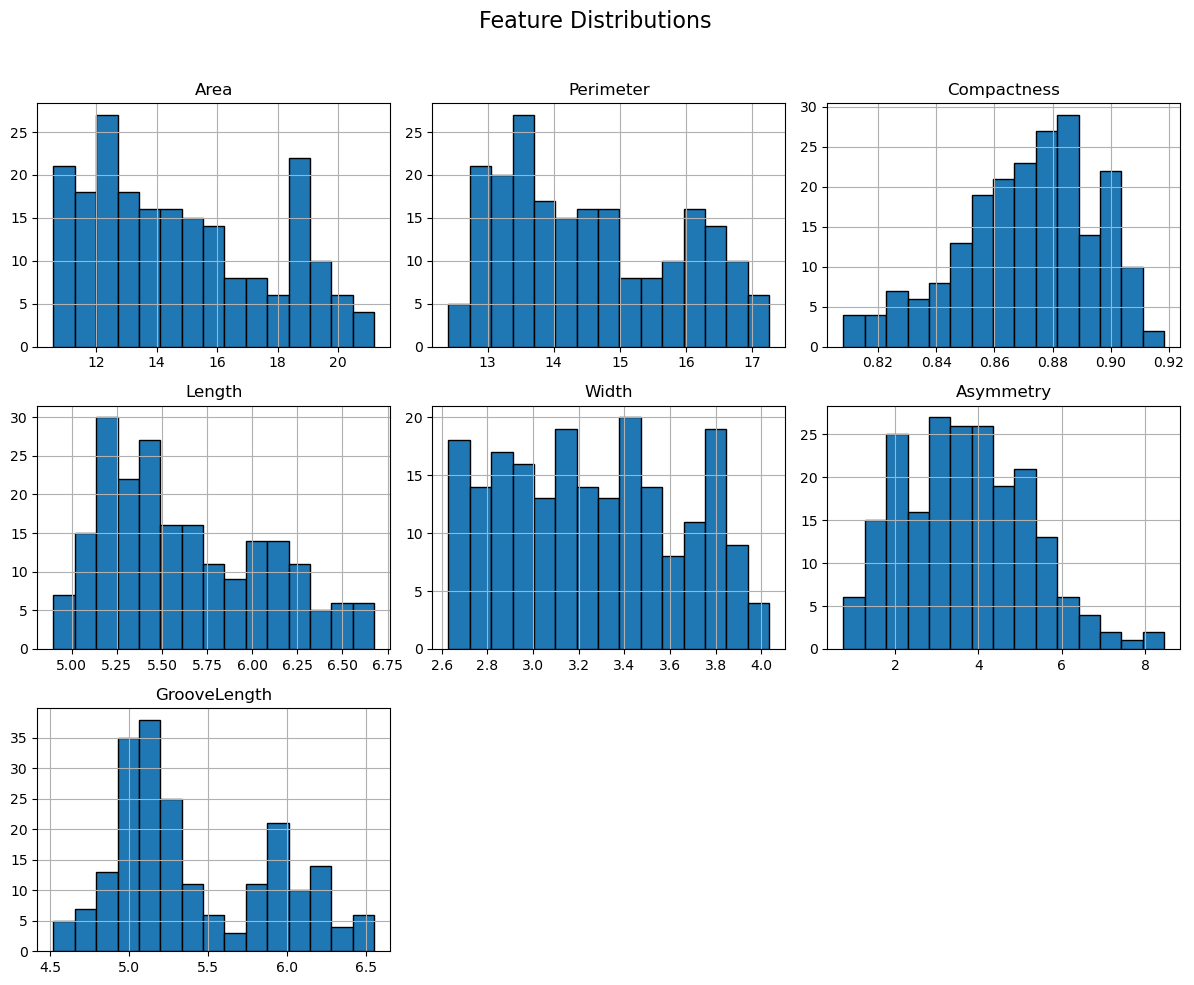

In [46]:
# Visualize feature distributions
data.drop(columns=['Class']).hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

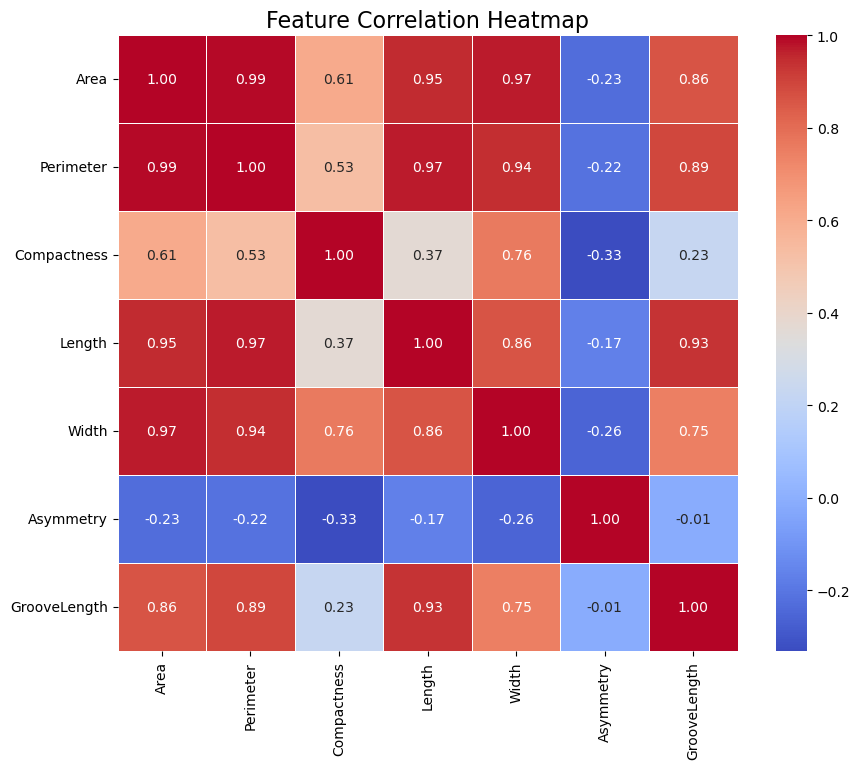

In [50]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['Class']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

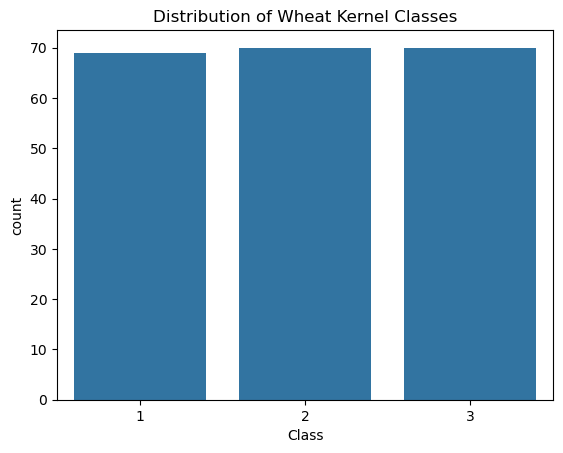

In [52]:
# Distribution of the target variable
sns.countplot(data=data, x='Class')
plt.title('Distribution of Wheat Kernel Classes')
plt.show()

## Question 2: K-Means Clustering



In [55]:
# Scale the data (excluding the target column 'Class')
scaler = StandardScaler()
features = data.drop(columns=['Class'])
scaled_features = scaler.fit_transform(features)

In [59]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [61]:
# Add cluster labels to the dataset
data['KMeans_Cluster'] = kmeans_labels

In [63]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
print(f"K-means Silhouette Score: {silhouette_avg}")

K-means Silhouette Score: 0.4037753529424651


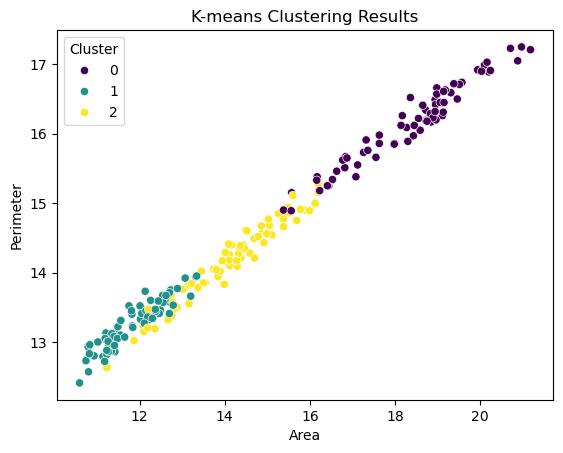

In [65]:
# Visualize the clusters
sns.scatterplot(x=features['Area'], y=features['Perimeter'], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering Results')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(title='Cluster')
plt.show()

## Question 3: Hierarchical Clustering

In [76]:
# Perform hierarchical clustering using different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
for method in linkage_methods:
    # Compute linkage matrix
    Z = linkage(scaled_features, method=method)

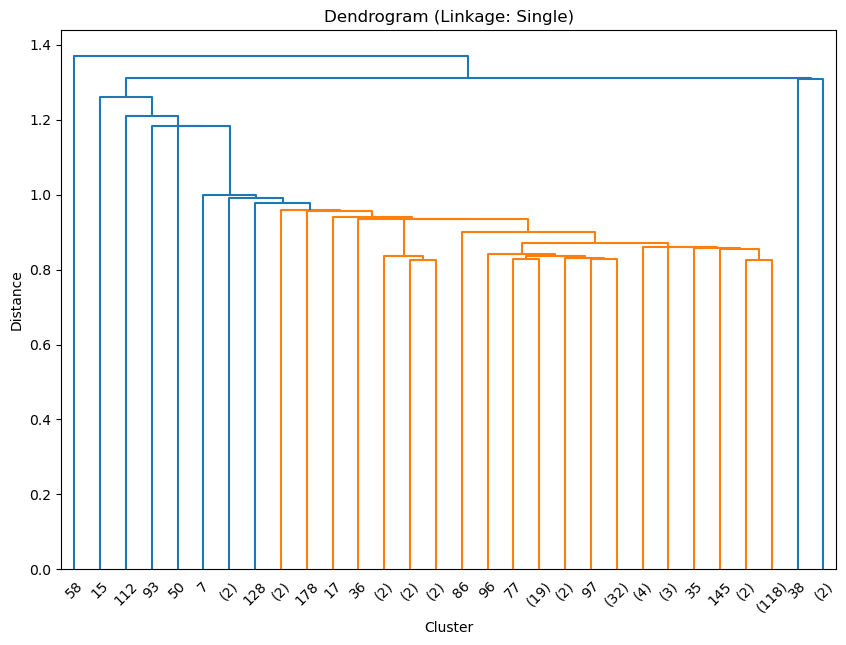

Hierarchical Clustering (Linkage: Single) Silhouette Score: -0.006784717372291456


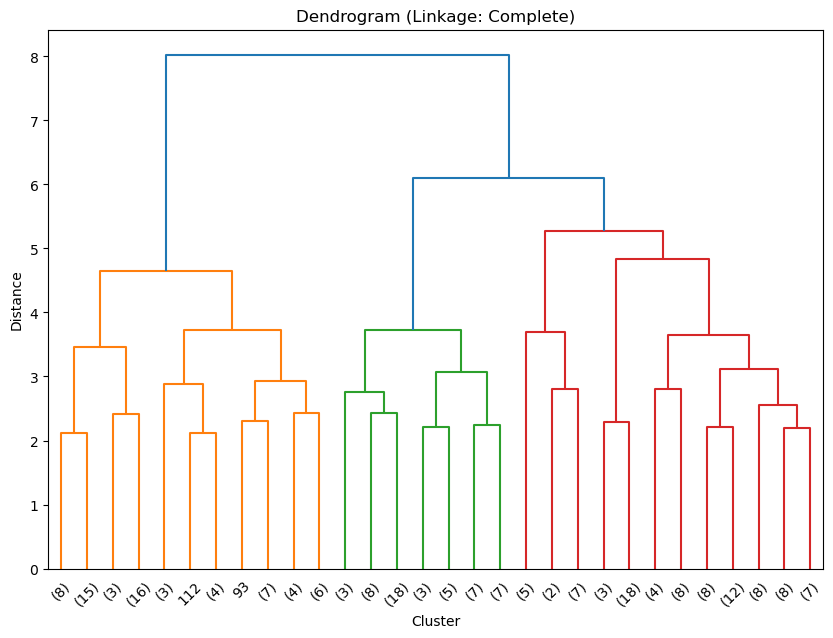

Hierarchical Clustering (Linkage: Complete) Silhouette Score: 0.3489319544087459


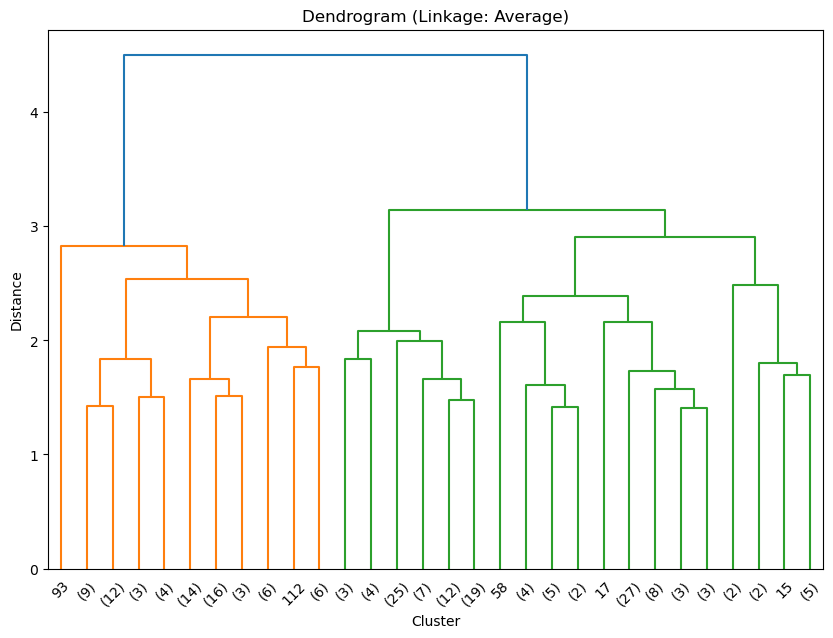

Hierarchical Clustering (Linkage: Average) Silhouette Score: 0.3761603731185115


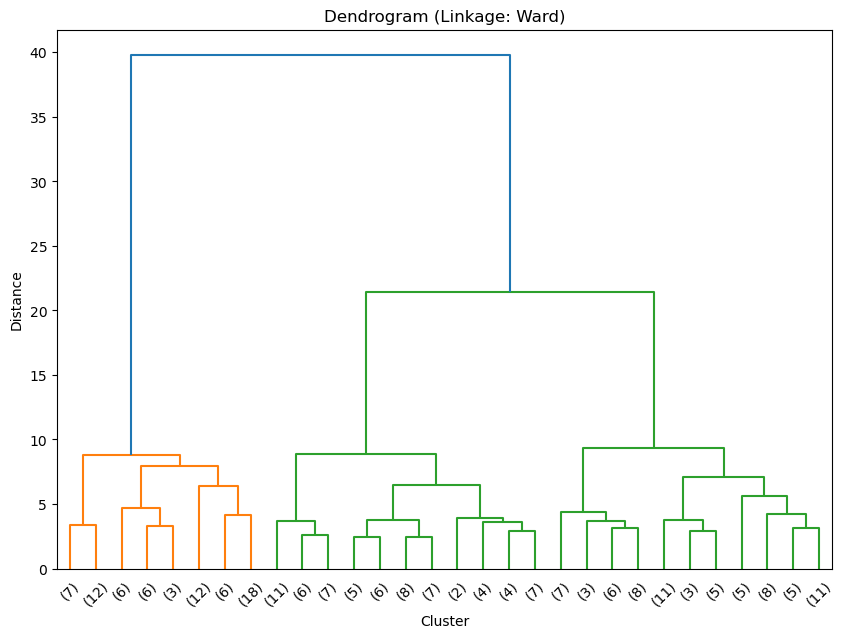

Hierarchical Clustering (Linkage: Ward) Silhouette Score: 0.3922387796755861


In [84]:
#Perform hierarchical clustering using different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    # Compute linkage matrix
    Z = linkage(scaled_features, method=method)
    
    # Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z, truncate_mode='lastp', p=30)
    plt.title(f'Dendrogram (Linkage: {method.capitalize()})')
    plt.xlabel('Cluster')
    plt.ylabel('Distance')
    plt.show()
    
    # Assign cluster labels (e.g., 3 clusters)
    clusters = fcluster(Z, 3, criterion='maxclust')
    silhouette_avg = silhouette_score(scaled_features, clusters)
    print(f"Hierarchical Clustering (Linkage: {method.capitalize()}) Silhouette Score: {silhouette_avg}")


## Question 4: DBSCAN Clustering

In [89]:
# Try different eps and min_samples values to find the best clustering
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(2, 10)

best_silhouette = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)
        
        # Ignore if all points are treated as noise
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(scaled_features, labels)
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_params = (eps, min_samples)

In [91]:
# Display the best parameters
print(f"Best DBSCAN parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best DBSCAN Silhouette Score: {best_silhouette}")

Best DBSCAN parameters: eps=1.0, min_samples=8
Best DBSCAN Silhouette Score: 0.2691200523087607


In [93]:
# Apply DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
dbscan_labels = dbscan.fit_predict(scaled_features)


In [95]:
# Add DBSCAN cluster labels to the dataset
data['DBSCAN_Cluster'] = dbscan_labels

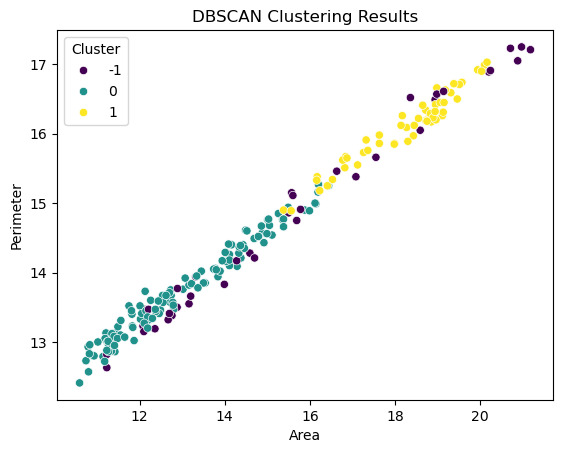

In [97]:
# Visualize DBSCAN clusters
sns.scatterplot(x=features['Area'], y=features['Perimeter'], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(title='Cluster')
plt.show()